In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
N = 1000 #largo del proceso
V = np.random.normal(loc = 0, scale = 2, size = (N,))
#NOTA: loc es la media y scale es el desvío (no la varianza)

(1999,) (1999,)


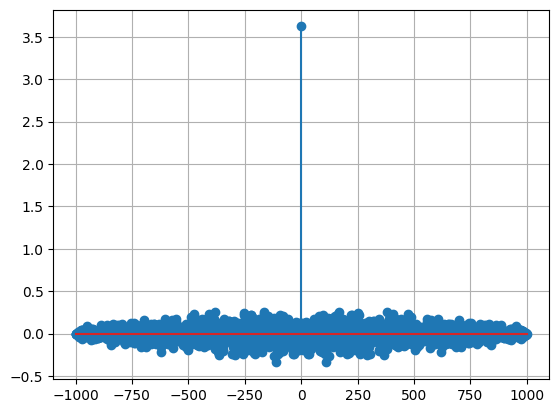

In [31]:
R = (1/len(V)) * np.correlate(V, V, mode = 'full')
k = np.arange(start = -(N-1), stop = N) #de -(N-1) (inclusive) a N (no incluido)
print(k.shape, R.shape)


plt.stem(k, R)
plt.grid(True)
plt.show()

Estimar por el periodograma es hacer el cuadrado del modulo de la FFT dividido por N

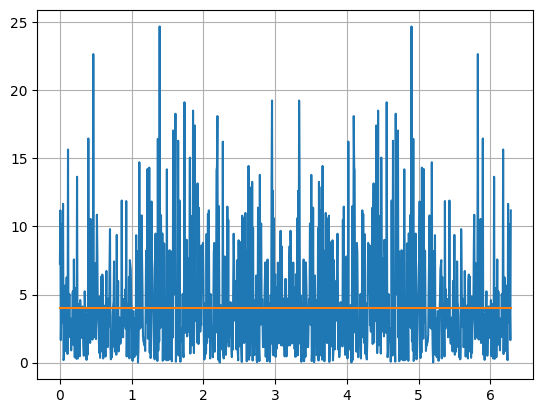

In [28]:
F = np.fft.fft(V)
S_est = (1/N) * np.abs(F)**2 #PSD estimada
w = np.linspace(start = 0, stop = 2 * np.pi, num = len(S_est))

S_real = 4*np.ones(len(S_est))
plt.plot(w, S_est)
plt.plot(w, S_real)
plt.grid(True)
plt.show()

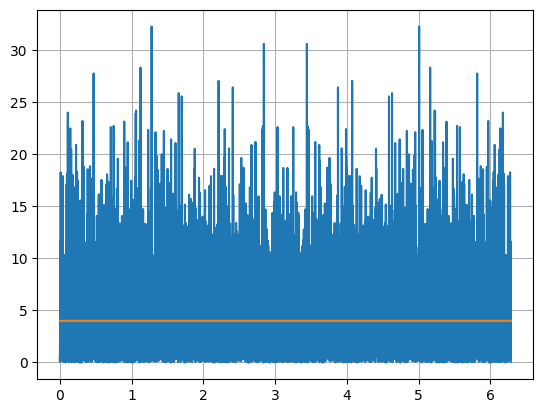

In [32]:
N = 10000 #largo del proceso
V = np.random.normal(loc = 0, scale = 2, size = (N,))
#NOTA: loc es la media y scale es el desvío (no la varianza)
F = np.fft.fft(V)
S_est = (1/N) * np.abs(F)**2 #PSD estimada
w = np.linspace(start = 0, stop = 2 * np.pi, num = len(S_est))

S_real = 4*np.ones(len(S_est))
plt.plot(w, S_est)
plt.plot(w, S_real)
plt.grid(True)
plt.show()

Se ve igual de mal. XD

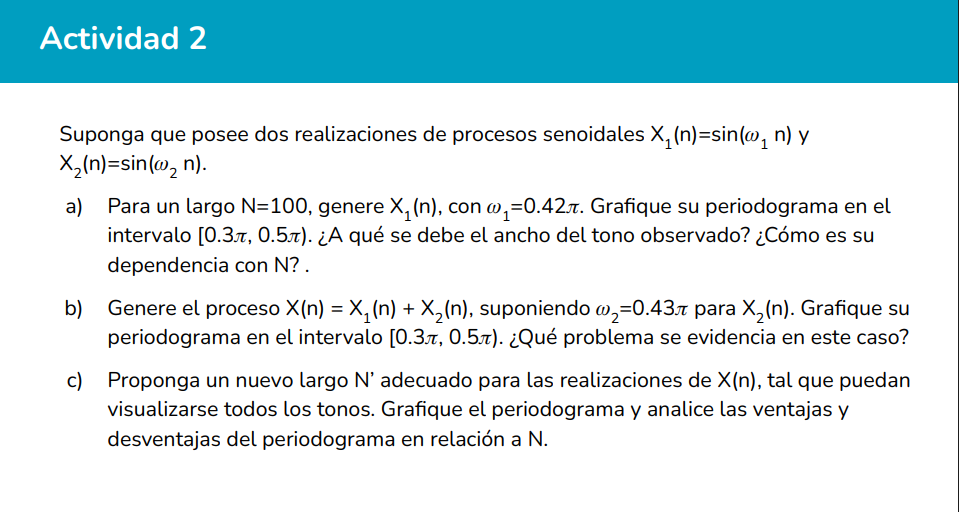

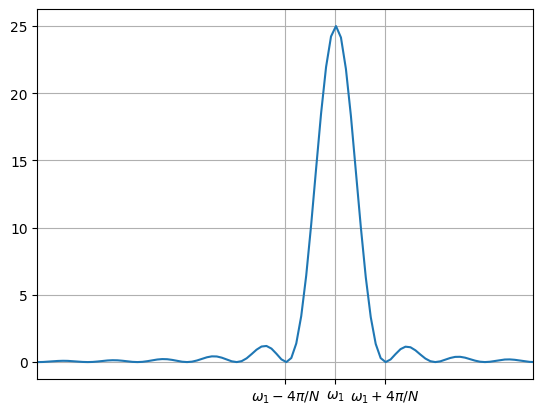

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
w1 = 0.42 * np.pi
n = np.arange(N)
X1 = np.sin(w1 * n)

S1 = 1/N * np.abs(np.fft.fft(X1, n = 1000))**2

frecs = np.linspace(start = 0, stop = 2 * np.pi, num = len(S1))

plt.plot(frecs, S1)
plt.xlim(0.3 * np.pi, 0.5 * np.pi)
a = 4 * np.pi / len(X1) #ancho del lóbulo
plt.xticks([w1 - a/2, w1, w1 + a/2], [f'$\omega_1 - 4\pi/N$', f'$\omega_1$', f'$\omega_1 + 4\pi/N$'])
plt.grid(True)
plt.show()

Ventaneé esta señal con una ventana rectangular de largo N = 100. De ahí que le ancho de lóbulo sea $4\pi/100 = \pi/25 = 0.04 \pi$

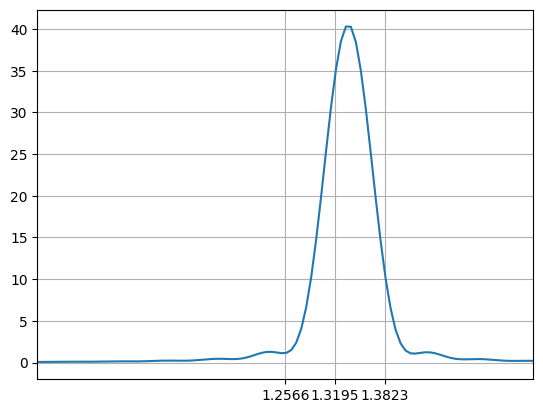

In [62]:
w2 = 0.43 * np.pi
X2 = np.sin(w2 * n)

X = X1 + X2

SX = 1/N * np.abs(np.fft.fft(X, n = 1000))**2

frecs = np.linspace(start = 0, stop = 2 * np.pi, num = len(SX))
plt.plot(frecs, SX)
plt.xlim(0.3 * np.pi, 0.5 * np.pi)
plt.xticks([w1 - a/2, w1, w1 + a/2])
plt.grid(True)
plt.show()

No se distinguen los lóbulos de las 2 frecuencias xq ventaneé con largo 100, $a = 0.04\pi$. Para poder distinguir 2 frecuencias $| \omega_1 - \omega_2| > a/2 = 0.02 \pi$

ya que $|\omega_1 - \omega_2| = 0.01\pi = a/2 ==> a = 0.02 \pi = 4\pi/M ==> M = 200$

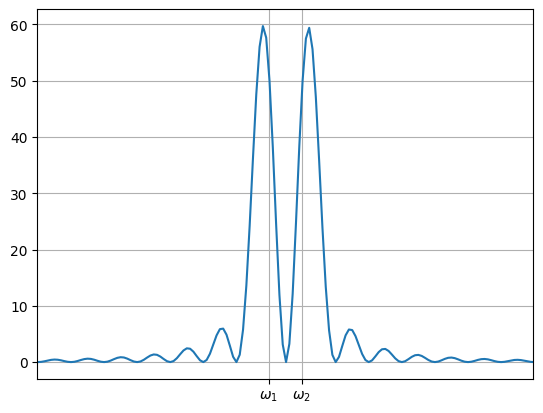

In [79]:
N = 200
w1 = 0.42 * np.pi
n = np.arange(N)
X1 = np.sin(w1 * n)
w2 = 0.43 * np.pi
X2 = np.sin(w2 * n)
X = X2 + X1
S_200 = 1/N * np.abs(np.fft.fft(X, n = 2000))**2

frecs = np.linspace(start = 0, stop = 2 * np.pi, num = len(S_200))
plt.plot(frecs, S_200)
plt.xlim(0.35 * np.pi, 0.50 * np.pi)
a = 4*np.pi/N
plt.xticks([w1, w2], ["$\omega_1$", "$\omega_2$"])
plt.grid(True)
plt.show()


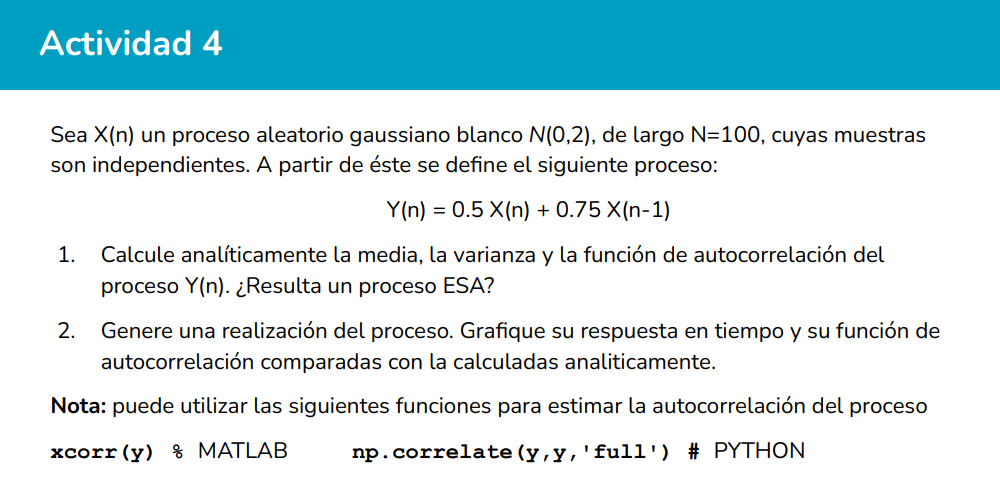


$E[Y(n)] = 0.5 E[X(n)] + 0.75 E[X(n-1)] = 0 + 0 = 0$


$V[Y(n)] = V[0.5X(n) + 0.75 X(n-1)] = 0.5^2V[X(n-1)] + 0.75^2V[X(n-1)] = 0.25.2 + 9/16.2 = 1\frac{5}{8}$

$R_Y(k) = E[Y(n)Y(n+k)] = E[[0.5X(n) + 0.75 X(n-1)].[0.5X(n+k) + 0.75 X(n+k-1)]] = 0.5^2E[X(n)X(n+k)] + 0.375E[X(n)X(n+k-1)] +0.375E[X(n-1)X(n+k)]+\frac{9}{16}E[X(n-1)X(n+k-1)]$

Para k = 0
$R(0) = V[Y(n)] = 1\frac{5}{8}$

Para k = 1

$0.375.V[X(n)] = 0.75$

Para k mayores da 0

Para los k < 0 tengo que reflejar

Entonces:

$
R_Y(k) = 0,75 \delta(k - 1) + 1,625\delta(k) + 0,75\delta(k + 1)
$

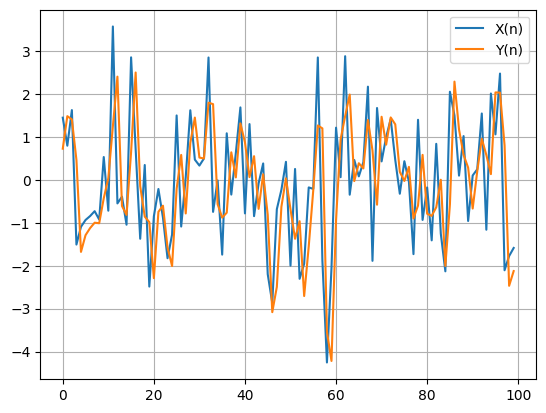

In [11]:
N = 100

b0 = 0.5
b1 = 0.75

X = np.random.normal(0, np.sqrt(2), N)
Y = np.zeros(N) #en realidad Y tiene N + 1 bochas, pero bue

Y[0] = b0 * X[0]

for i in range(1, N):
    Y[i] = b0 * X[i] + b1 * X[i - 1]

plt.plot(X, label = 'X(n)')
plt.plot(Y, label = 'Y(n)')


plt.legend()
plt.grid(True)
plt.show()


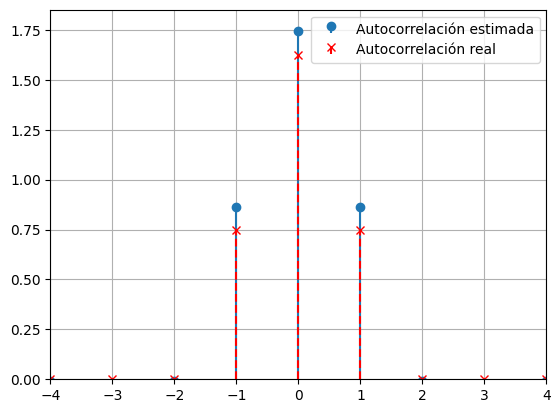

In [17]:
RY_est = (1/N) * np.correlate(Y, Y, mode = 'full')

tau = np.arange(start = -(N - 1), stop = N)

plt.stem(tau, RY_est, basefmt='none', label = 'Autocorrelación estimada')


RY_real = np.zeros(tau.shape)

RY_real[tau == - 1] = 0.75
RY_real[tau == 1] = 0.75
RY_real[tau == 0] = 1.625

plt.stem(tau, RY_real, basefmt='none', label='Autocorrelación real', linefmt='r--', markerfmt='rx')

plt.ylim(0)

plt.xlim(-4, 4)

plt.legend()
plt.grid(True)
plt.show()

Casi Gaussiano

Como Y depende de X(n-1), esta correlacionada con Y(n + 1) y con Y(n - 1)

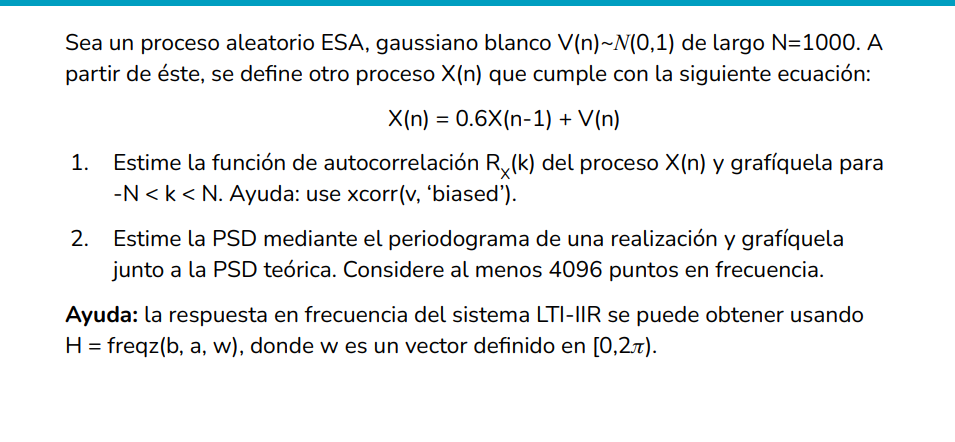

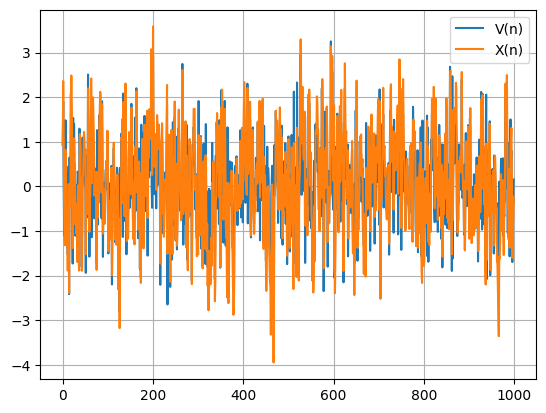

In [33]:
N = 1000
a0 = 0.5 #ojo con este valor, xq la estabilidad del sistema depende de él

V = np.random.randn(N)

X = np.zeros(N) #otra vez, X debería tener N + 1 elementos

X[0] = V[0] #X(-1) = 0

for i in range(1, N):
    X[i] = a0*X[i-1] + V[i]

plt.plot(V, label = 'V(n)')
plt.plot(X, label = 'X(n)')

plt.legend()
plt.grid(True)
plt.show()

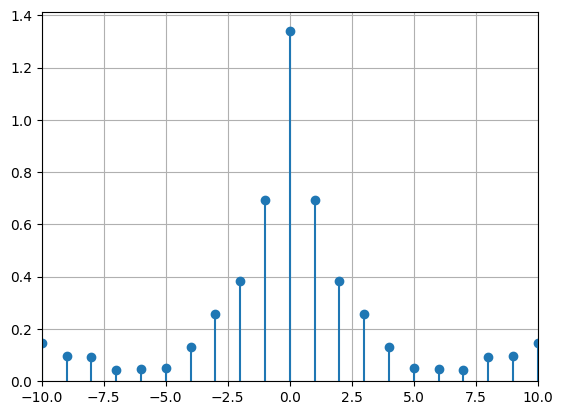

In [38]:
RX = (1/N) * np.correlate(X, X, mode = 'full')

tau = np.arange(start = -(N - 1), stop = N)

plt.stem(tau, RX, basefmt = 'none')

plt.ylim(0)

plt.xlim(-10, 10)

plt.grid(True)
plt.show()

Y la real cómo es?

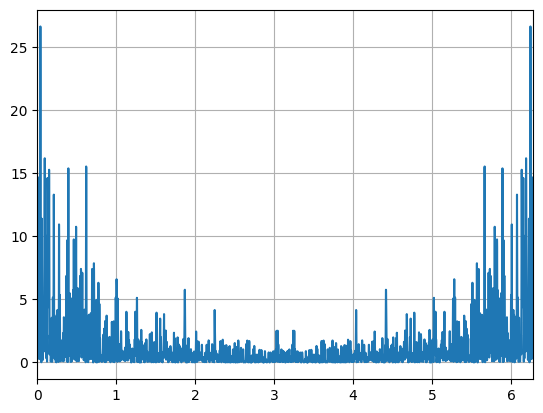

In [41]:
periodograma = 1/N * np.abs(np.fft.fft(X, n = 4096)) **2


w = np.linspace(start = 0, stop = 2 * np.pi, num = len(periodograma))

plt.plot(w, periodograma)

plt.xlim(0, 2*np.pi)

plt.grid(True)
plt.show()